In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
def comp_trends(Y, scale, order):
    x = np.arange(scale, dtype='f8')
    subset_lists = [Y[i:i+scale] for i in range(0, len(Y), scale)]
    if np.mod(len(Y),scale)>0:
        subset_lists.pop()
    Fs = []
    for ls in subset_lists:
        C = np.polyfit(x,ls, order)
        fit = np.polyval(C,x)
        Fs.append(np.sqrt(np.mean((ls-fit)**2)))
    return np.array(Fs)

def comp_Fqs (ts, scales, order, q):
    Y = np.cumsum(ts - np.mean(ts))
    F = []
    for scale in scales:    
        Fs = comp_trends(Y, scale, order)
        if q==0:
            F.append(np.exp(0.5*np.mean(np.log(Fs**2))))
        else:
            F.append(np.power((np.mean(Fs**q)), 1./q))
    return F

In [2]:
from scipy.io import loadmat

o = loadmat('fractaldata.mat')
whitenoise = o['whitenoise']
monofractal = o['monofractal']
multifractal = o['multifractal']
SAVE = False

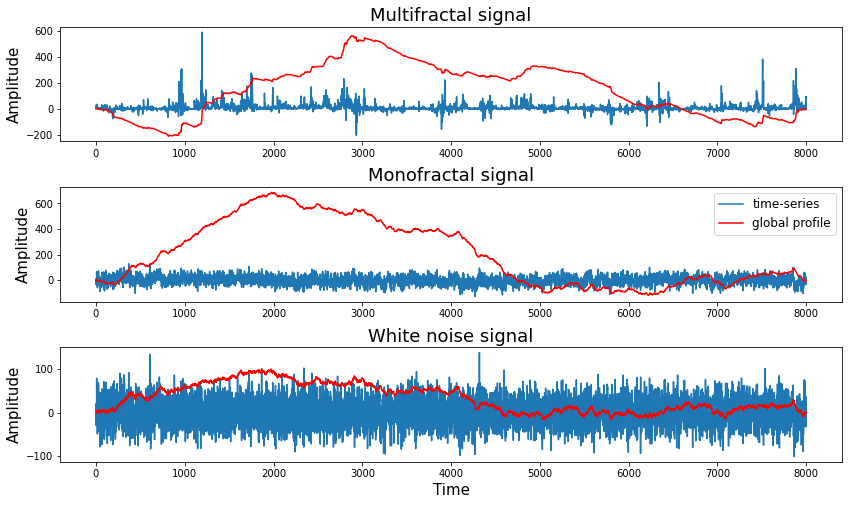

In [13]:
plt.rcParams['figure.figsize'] = (14,8)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)


RW1=np.cumsum(whitenoise-np.mean(whitenoise));
RW2=np.cumsum(monofractal-np.mean(monofractal));
RW3=np.cumsum(multifractal-np.mean(multifractal));
fs=15
A = 30.0

plt.subplot(311)
plt.plot(A*multifractal)
plt.plot(RW3,'r',lw=1.5)
plt.ylabel('Amplitude',ha='center', fontsize=fs)
plt.title("Multifractal signal", fontsize=18)

plt.subplot(312)
plt.plot(A*monofractal)
plt.plot(RW2,'r',lw=1.5)
plt.legend(['time-series','global profile'], fontsize=12)
plt.ylabel('Amplitude',ha='center', fontsize=fs)
plt.title("Monofractal signal", fontsize=18)



plt.subplot(313)
plt.plot(A*whitenoise)
plt.plot(RW1,'r',lw=1.5)
plt.ylabel('Amplitude',ha='center', fontsize=fs)
plt.xlabel("Time", fontsize=fs)
plt.title("White noise signal", fontsize=18)


plt.savefig('hurst_signals.pdf', bbox_inches="tight", dpi=200)

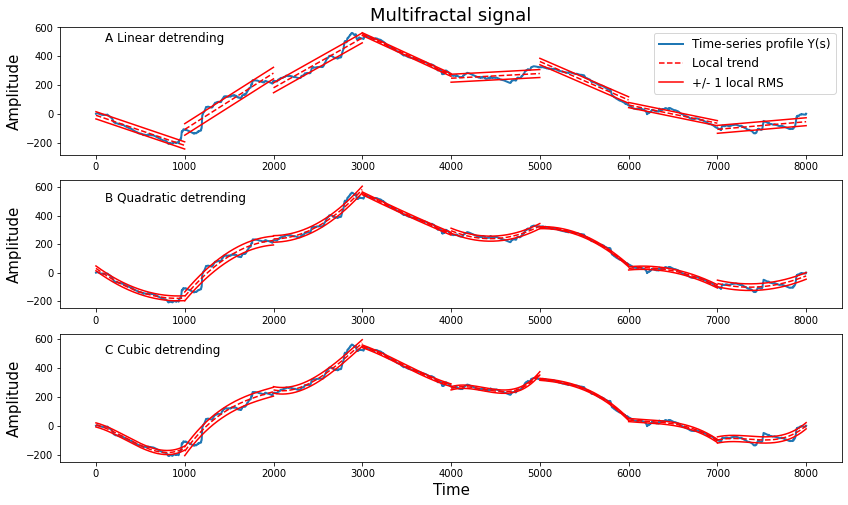

In [14]:
def plot_trends(X,scale,m=1,label='',title=''):
    t = np.arange(X.shape[0])
    plt.plot(t,X,lw=2.0)
    for i0 in range(0,X.shape[0]-scale+1,scale):
        i1 = i0+scale
        t0 = t[i0:i1]
        C = np.polyfit(t0,X[i0:i1],m)
        fit = np.polyval(C,t0);
        RMS = np.sqrt(((X[i0:i1]-fit)**2).mean())
        plt.plot(t0,fit,'r--')
        plt.plot(t0,fit-RMS,'r')
        plt.plot(t0,fit+RMS,'r')
    plt.ylabel(label,ha='center', fontsize=15)
    if title: plt.text(100,500,title,fontsize=12) 
plt.rcParams['figure.figsize'] = (14,8)

scale = 1000
RW = np.cumsum(multifractal-multifractal.mean())

plt.subplot(311)
plot_trends(RW,scale,1,label='Amplitude',title='A Linear detrending')
plt.legend(['Time-series profile Y(s)','Local trend','+/- 1 local RMS'], fontsize=12)
plt.title("Multifractal signal", fontsize=18)
plt.subplot(312)
plot_trends(RW,scale,2,label='Amplitude', title='B Quadratic detrending')
plt.subplot(313)
plot_trends(RW,scale,3,label='Amplitude', title='C Cubic detrending')
plt.xlabel("Time", fontsize=fs)

plt.savefig('hurst_detrending.pdf', bbox_inches="tight", dpi=200)

[ 0.53830447 -1.542534  ]
[ 0.72794398 -1.70976472]
[ 0.78944287 -1.94977342]


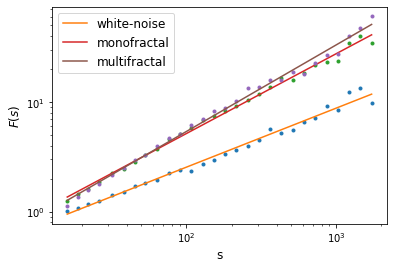

In [17]:
plt.rcParams['figure.figsize'] = (6,4)

TS = np.loadtxt("PS_ts.data")
x, ts= zip(*TS)
q=2
scales = np.floor(2.0**np.arange(4,11,0.25)).astype('i4')
F= comp_Fqs(ts, scales, 1, q)
f = np.polyfit(np.log(scales),np.log(F),1)
print(f)
plt.loglog(scales, F, '.', )# label = "q=2,m=1, H = %f"%f[0])
plt.plot(scales, np.exp(np.polyval(f, np.log(scales))), label="white-noise")

ts=monofractal
q=2
scales = np.floor(2.0**np.arange(4,11,0.25)).astype('i4')
F= comp_Fqs(ts, scales, 1, q)
f = np.polyfit(np.log(scales),np.log(F),1)
print(f)
plt.loglog(scales, F, '.')# label = "q=2,m=1, H = %f"%f[0])
plt.plot(scales, np.exp(np.polyval(f, np.log(scales))), label="monofractal")

ts=multifractal
q=2
scales = np.floor(2.0**np.arange(4,11,0.25)).astype('i4')
F= comp_Fqs(ts, scales, 1, q)
f = np.polyfit(np.log(scales),np.log(F),1)
print(f)
plt.loglog(scales, F, '.', )#label = "q=2,m=1, H = %f"%f[0])
plt.plot(scales, np.exp(np.polyval(f, np.log(scales))), label="multifractal")

plt.ylabel(r'$F(s)$', fontsize=12)
plt.xlabel('s', fontsize = 12)
plt.legend(fontsize=12)
plt.savefig('hurstfit.png', bbox_inches='tight')
plt.show()

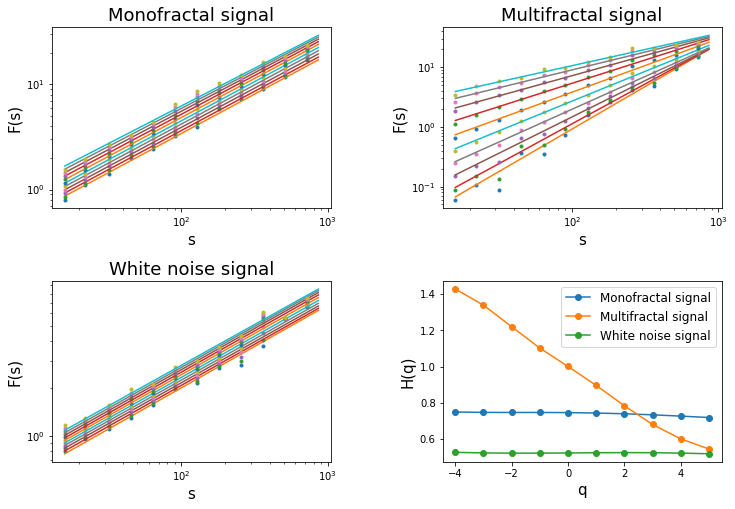

In [18]:
def get_Hq(ts, scales, m, plotq):
    
    H=[]
    for q in plotq:
        F= comp_Fqs(ts, scales, m, q)
        f = np.polyfit(np.log(scales),np.log(F),1)
        plt.loglog(scales[::2], F[::2], '.')
        plt.loglog(scales, np.exp(np.polyval(f, np.log(scales))))
        H.append(f[0])
        plt.ylabel("F(s)", fontsize=15)
        plt.xlabel("s", fontsize=15)
        
    return H
        
plt.rcParams['figure.figsize'] = (12,8)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

scales = np.floor(2.0**np.arange(4,10,0.25)).astype('i4')
plotq = [ -4, -3,-2,-1,0,1,2,3,4, 5]

plt.subplot(2, 2, 1)
ts = monofractal
Hmono = get_Hq(ts, scales, 1, plotq,)  
plt.title("Monofractal signal", fontsize=18)

plt.subplot(2, 2, 2)
ts = multifractal
Hmulti = get_Hq(ts, scales, 1, plotq,)  
plt.title("Multifractal signal", fontsize=18)



plt.subplot(2, 2, 3)

TS = np.loadtxt("PS_ts.data")
x, ts= zip(*TS)
Hwn = get_Hq(ts, scales, 1, plotq,)  
plt.title("White noise signal", fontsize=18)



plt.subplot(2, 2, 4)

plt.plot(plotq, Hmono, 'o-', label="Monofractal signal")

plt.plot(plotq, Hmulti, 'o-', label="Multifractal signal")
plt.plot(plotq, Hwn, 'o-', label="White noise signal")
plt.xlabel("q", fontsize=15)
plt.ylabel("H(q)", fontsize=15)
plt.legend(fontsize=12)

plt.savefig("hurst_mfdfa.pdf", bbox_inches="tight", dpi=200)